In [17]:
import cv2
import datetime as dt
import glob
import itertools
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
# from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten, Reshape, Input, InputLayer
#from keras.layers.convolutional import MaxPooling2D
#from tensorflow.keras.layers import Dense,Dropout,Flatten, Reshape, Input, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
#from keras.layers import Dense, Flatten, Reshape, Input, InputLayer


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from sklearn.metrics import confusion_matrix
print ("TensorFlow version: " + tf.__version__)


TensorFlow version: 2.3.0


In [18]:
train_dir=r'F:\\GAIT RECOGNITION\\fulldatasetwithcloth\\train'
test_dir = r'F:\\GAIT RECOGNITION\\fulldatasetwithcloth\\test'

(240, 240, 3)


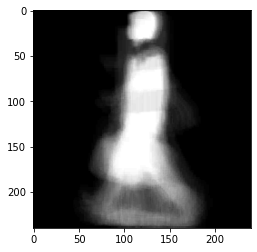

In [19]:
img = cv2.imread('F:\\GAIT RECOGNITION\\fulldatasetwithcloth\\train\\002\\002-bg-01-108.png')
print(img.shape)
plt.imshow(img);

In [20]:
height=240
width=240
batch_size=32

# Training generator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    color_mode='grayscale',
                                                    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  color_mode='grayscale',
                                                  shuffle = False,
                                                  class_mode='categorical')

Found 7657 images belonging to 124 classes.
Found 4945 images belonging to 124 classes.


In [21]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005),activation='relu',input_shape=(240,240,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(128, (3, 3),kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(1024,kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005), activation='relu'))
model.add(Dense(124,kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005), activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 238, 238, 16)      160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 119, 119, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 117, 117, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 58, 58, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)            

In [22]:
history = model.fit(train_generator,  
                    epochs=8
                    )

Epoch 1/8
240/240 [==============================] - 167s 696ms/step - loss: 4.4384 - acc: 0.0832
Epoch 2/8
240/240 [==============================] - 167s 696ms/step - loss: 1.6840 - acc: 0.6304
Epoch 3/8
240/240 [==============================] - 167s 698ms/step - loss: 0.7847 - acc: 0.8748
Epoch 4/8
240/240 [==============================] - 168s 700ms/step - loss: 0.5788 - acc: 0.9275
Epoch 5/8
240/240 [==============================] - 169s 702ms/step - loss: 0.4968 - acc: 0.9497
Epoch 6/8
240/240 [==============================] - 168s 701ms/step - loss: 0.4383 - acc: 0.9657
Epoch 7/8
240/240 [==============================] - 168s 702ms/step - loss: 0.4416 - acc: 0.9598
Epoch 8/8
240/240 [==============================] - 169s 706ms/step - loss: 0.4034 - acc: 0.9689


In [23]:
test_acc = model.evaluate(test_generator,verbose=1)                  
print(test_acc)

155/155 [==============================] - 27s 171ms/step - loss: 0.6571 - acc: 0.9104
[0.6570864319801331, 0.9104145765304565]


In [24]:
model.save("modelfullwithcloth.h5")